# Introduction to Partial Differential Equations
---

## Chapter 1: Preliminaries (Calculus, Linear Algebra, ODEs, and Python)
---

## Want to use Colab? [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/CU-Denver-MathStats-OER/Intro-PDEs-Theory-and-Computations/blob/main/Chp1/Chp1Sec4.ipynb)

---

## Prepping the environment for interactive plots in Colab
---

In [ ]:
if 'google.colab' in str(get_ipython()):
    print('Running on CoLab - installing missing packages')
    !pip install ipympl
    from IPython.display import clear_output
    clear_output()
    exit()
else:
    print('Not running on CoLab - assuming environment has necessary packages')

In [ ]:
%matplotlib widget
if 'google.colab' in str(get_ipython()):
    from google.colab import output
    output.enable_custom_widget_manager()

## Creative Commons License Information
---

<a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc/4.0/80x15.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">Introduction to Partial Differential Equations: Theory and Computations</span> by <a xmlns:cc="http://creativecommons.org/ns#" href="https://github.com/CU-Denver-MathStats-OER/Intro-PDEs-Theory-and-Computations" property="cc:attributionName" rel="cc:attributionURL">Troy Butler</a> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc/4.0/">Creative Commons Attribution-NonCommercial 4.0 International License</a>.<br />Based on a work at <a xmlns:dct="http://purl.org/dc/terms/" href="https://github.com/CU-Denver-MathStats-OER/Intro-PDEs-Theory-and-Computations" rel="dct:source">https://github.com/CU-Denver-MathStats-OER/Intro-PDEs-Theory-and-Computations</a>.

## Section 1.4: Stability of a Differential Equation
---

The issue of stability of a solution is very important and is the focus of this notebook in the context of [differential equations](https://en.wikipedia.org/wiki/Stability_theory).
This is conceptually related to the concept of stability of a numerical method, which is something we will study in more detail later in the semester.

We can pose many questions regarding stability, but conceptually it almost always boils down to the following type of question
> If quantity $X$ in the differential equation/data is perturbed by a small amount $\epsilon$, does the perturbation to the solution also become small if we wait long enough?

You may recall such questions arise when studying the [stability of equilibrium solutions/fixed points](https://en.wikipedia.org/wiki/Stability_theory#Linear_autonomous_systems) to first-order autonomous ODEs. 
Here, we briefly describe the stability of a solution with respect to perturbations of an initial condition, which is a common stability problem of interest. 

Another way to conceptualize stability is through the lens of continuity. This has some particular advantages in terms of how we go about proving stability. 

We first explore this with some plots.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Consider solutions to $u'(t)=-u(t)$ with IC $u(0)=u_0$

def simple_solution(t, u_0):
    return u_0 * np.exp(-t)

In [3]:
# Define an IC
u_0 = 1

# Define a "small" perturbation
delta = 0.1

# Define the perturbed IC, $v_0 = u_0+\delta $, call solution $v(t)$
v_0 = u_0 + delta

Text(0.5, 1.0, '$|u(t)-v(t)|$')

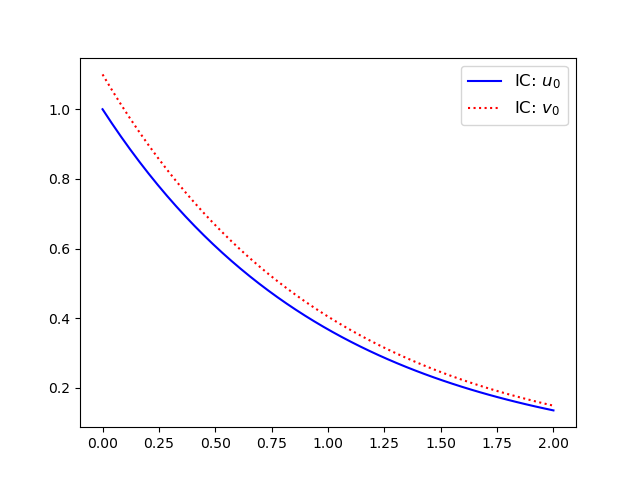

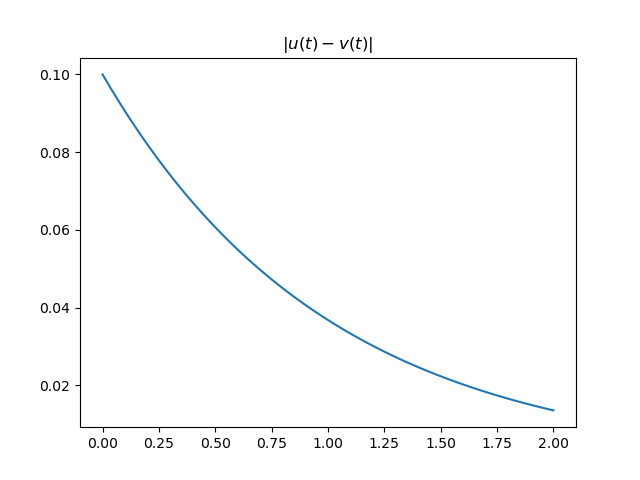

In [4]:
%matplotlib widget

t = np.linspace(0, 2, 50)

plt.figure(0)
# Plot the solutions using the original IC and its perturbed value
plt.plot(t, simple_solution(t, u_0), 'b', label='IC: $u_0$')
plt.plot(t, simple_solution(t, v_0), 'r:', label='IC: $v_0$')
plt.legend(fontsize=12)

plt.figure(1)
# Plot the absolute value of the difference in solutions to observe stability.
# Stability here is interpreted as meaning that the difference in solutions 
# will become smaller than any particular tolerance if we just wait long enough. 
plt.plot(t, np.abs(simple_solution(t, u_0)-simple_solution(t, v_0)))
plt.title('$|u(t)-v(t)|$')

---
### Section 1.4.1: Defining stability with respect to an initial condition
---

**What do we observe in the plots above?**

We observe ***stability with respect to an initial conditions (IC)*** defined, conceptually, as follows for IVPs.

> If small perturbations of the IC imply *eventually* small perturbations of the solution, then we have a ***stable*** IVP. Otherwise, the problem is unstable.

Before we give a more rigorous mathematical definition, we write down the general form of an IVP considered here as

$$
    \begin{cases}
        u'(t) &= f(t, u(t)), \ t>t_0 \\
        u(t_0) &= u_0,
    \end{cases}
$$

A more rigorous mathematical definition of stability with respect to an IC is: 

> For an IVP with IC $u_0$ and solution $u(t)$, we call the IVP stable with respect to perturbations in the IC if for all $T, \epsilon>0$ there exists an $\delta>0$ such that $|u_0-v_0|<\delta$ implies $|u(t)-v(t)|<\epsilon$ for all $t\geq T$. Here, $v(t)$ denotes the solution to the IVP with IC $v_0$.

The choices of $\epsilon$ and $\delta$ in the above definition are meant to explicitly evoke memories of definitions of continuity.

---
#### Interpreting this definition
---

- The $T>0$ is used to quantify what we mean by "eventually."

- The $\epsilon>0$ is used to quantify what we mean by "small perturbations of the solution."

- The $\delta>0$ is used to quantify what we mean by "small perturbations of the IC."

- The definition is pointwise in the sense that an IVP may be stable for some choices of $u_0$ but not others. This is similar to how continuity of a function is defined. Continuity is a pointwise property for a function. A function may be continuous at one point but discontinuous at other points (e.g., consider the [Heaviside function](https://en.wikipedia.org/wiki/Heaviside_step_function) that is continuous at all but one point in its domain).

  - Even if an IVP is stable with respect to all ICs, this does not mean that the stability is uniform meaning that for a given choice of $T,\epsilon>0$, the $\delta>0$ we have to choose in a proof of stability is likely to depend upon the particular choice of $u_0$. A uniform stability would mean that a single $\delta>0$ can work for all choices of $u_0$. 
  
    This is very much like the difference between functions that are continuous (in a pointwise sense) compared to uniformly continuous. For example, $f:\mathbb{R}\to\mathbb{R}$ defined by $f(x)=x^2$ is continuous but not uniformly continuous whereas $f(x)=x$ and $f(x)=\sqrt{x}$ are both uniformly continuous on $\mathbb{R}$. Of course, any continuous real-valued function restricted to a closed-bounded interval $[a,b]$ is uniformly continuous on $[a,b]$. The issues arise when asymptotic growth rates "get out of hand" (so to speak). Since the temporal domain of dynamical systems is often taken to be $[t_0,\infty)$ for some initial time $t_0$, the asymptotics play a large role, which is why the rigorous mathematical definition of stability requires the solutions to stay close for all $t\geq T$. 

- We will generally say that an IVP is stable with respect to perturbations in ICs if it is stable *for all* ICs. 

  While we may also say that an IVP is unstable with respect to perturbations in ICs if it is unstable at any particular IC, it is important to keep in mind that the IVP may actually be stable to many choices of the IC and only unstable for a relatively small number of ICs. We will explore this below.
  
- If we identify a set, $\mathcal{S}\subset\mathbb{R}$, of ICs for which the IVP is stable for any IC in this set, then we will generally say that the IVP is stable with respect to perturbations in ICs chosen from $\mathcal{S}$. 

---
#### Other useful remarks
---

- We can define stability with respect to parameters (i.e., perturbations to coefficients in the differential equation) or any other quantity that we may perturb in the problem definition in similar ways. It is best to start with a conceptual definition like above that makes qualitative sense for what we want to mean by stability and then make it rigorous.

- Notice that we define stability for all $t\geq T$ to ensure that solutions "eventually" become *and* stay "close" (within an $\epsilon$ distance) to each other starting at some time $T$. The $\delta$ we may need to choose to "control" the perturbations in the IC is likely to change depending on how quickly we want solutions to become close to each other (i.e., on the value of $T$). 

  One would expect that if $u_0$ and $\epsilon>0$ for $T_1$ and $T_2$ with $t_0<T_1 < T_2$, then the $\delta$ needed for $T_1$ is likely going to be smaller than then $\delta$ needed for $T_2$. After all, $[T_2,\infty)\subset [T_1,\infty)$ meaning that if $T_1<T_2$, then we are requiring the solutions to become and stay close *sooner* when considering $T_1$ compared to $T_2$. 

  Similarly, if we consider $0<\epsilon_1<\epsilon_2$ but leave $u_0$ and $T$ fixed, then we also expect to need $\delta$ to be smaller for $\epsilon_1$ than for $\epsilon_2$.
  
  <mark>**The takeaway is that $\delta>0$ is, in general, a function of $u_0$, $T$, and $\epsilon>0$. It is sometimes useful to explicitly write $\delta$ as $\delta(u_0, T, \epsilon)$ to make it clear all the factors that shape the choice of this critical "control" parameter.**</mark>



Now let's look at an example of a nonlinear IVP that is unstable at some ICs. 

In [5]:
# Define solutions to $u'(t) = tu(t)(u(t)-2)$

def nonlinear_solution(t, u_0):
    return 2*u_0 / (u_0 + (2-u_0)*np.exp(t**2))

In [6]:
# Define ICs and perturbed ICs

# The IVP has a fixed point/equilibrium at $u_0=2$ but this is an unstable IC.
u_0 = 2

delta = 0.0001

v_0 = u_0 + delta 
w_0 = u_0 - delta

Text(0.5, 1.0, 'Unstable at $u_0=2$')

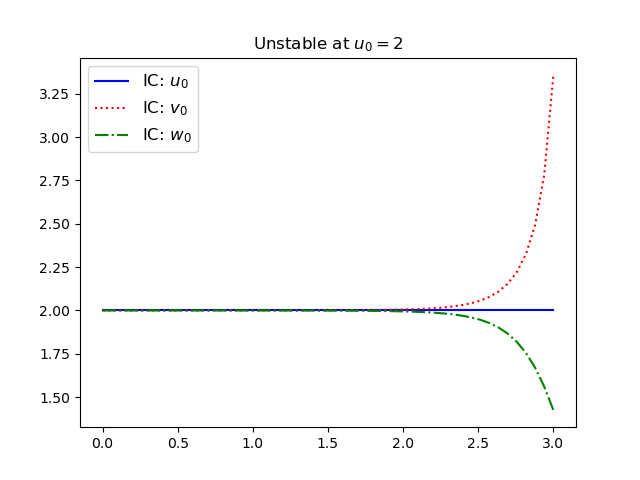

In [7]:
%matplotlib widget

t = np.linspace(0, 3, 50)

plt.figure(2)
plt.plot(t, nonlinear_solution(t, u_0), 'b', label='IC: $u_0$')
plt.plot(t, nonlinear_solution(t, v_0), 'r:', label='IC: $v_0$')
plt.plot(t, nonlinear_solution(t, w_0), 'g-.', label='IC: $w_0$')
plt.legend(fontsize=12)

plt.title('Unstable at $u_0=2$')

In [10]:
# Define ICs and perturbed ICs

u_0 = 2.01  # Try 1.99 and 2.01

delta = 0.001

v_0 = u_0 + delta 
w_0 = u_0 - delta

Text(0.5, 1.0, 'Stable at $u_0\\neq 2$? Consider $u_0<2$ and $u_0>2$ separately.')

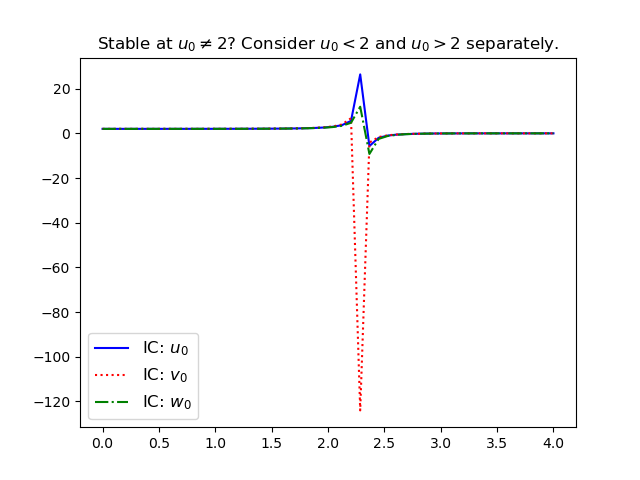

In [13]:
%matplotlib widget

t = np.linspace(0, 4, 50)  # Try different final times

plt.figure(3)
plt.plot(t, nonlinear_solution(t, u_0), 'b', label='IC: $u_0$')
plt.plot(t, nonlinear_solution(t, v_0), 'r:', label='IC: $v_0$')
plt.plot(t, nonlinear_solution(t, w_0), 'g-.', label='IC: $w_0$')
plt.legend(fontsize=12)

plt.title(r'Stable at $u_0\neq 2$? Consider $u_0<2$ and $u_0>2$ separately.')

---
#### Writing proofs of stability of an IVP for any $u_0\in\mathcal{S}\subset\mathbb{R}$.
---

The following steps are a guide for how to write a proper proof based on the above stability definition to show stability for ICs $u_0$ chosen from some set $\mathcal{S}\subset\mathbb{R}$.

**Step 1:** Let $u_0\in\mathcal{S}$, $T>0$, and $\epsilon>0$. 

**Step 2:** Explain how to choose $\delta>0$. 

**Step 3:** Let $v_0\in\mathbb{R}$ such that $|u_0-v_0|<\delta$.

**Step 4:** Let $t\geq T$.

**Step 5:** Show the desired conclusion follows that $|u(t)-v(t)|<\epsilon$. 

The concentration of effort is in determining how to choose $\delta>0$ in Step 2 (the "there exists" parts of definitions always correspond to the hardest parts of a proof). The way in which we do this is through "scratch work" where we start with the desired conclusion (i.e., that $|u(t)-v(t)|<\epsilon$ for all $t\geq T$) and work to get the term $|u_0-v_0|$ isolated on one side of this inequality. What is on the other side of the inequality should correspond to what we choose for $\delta$ in Step 2 with certain details of our scratch work showing up in Step 5.

In the end, we can write Steps 1, 3, and 4 exactly as given above for *every* proof of stability with respect to ICs and only the details of Steps 2 and 5 change as we consider different IVPs.

---
#### Example proof of stability of an IVP with respect to $u_0\in\mathcal{S}\subset\mathbb{R}$
---

Consider the IVP

$$
    \begin{cases}
        u'(t) &= -u(t), \ t>0 \\
        u(0) &= u_0.
    \end{cases}
$$

Prove this IVP is stable with respect to any IC $u_0\in\mathbb{R}$.

***Scratch work:***

Note that the solutions to this IVP are given by $u(t)=u_0e^{-t}$, so we let $v(t)=v_0e^{-t}$ denote the solution with respect to perturbed IC. Then, we get to work by supposing we "get what we want" which is the conclusion:

$
    \begin{align*}
        |u(t)-v(t)| &= |u_0e^{-t} - v_0e^{-t}| \\ \\
                    &= |u_0 - v_0|e^{-t}\\ \\ 
                    &\leq |u_0 - v_0|e^{-T}  \ \text{ (because $t\geq T$ implies $e^{-t}\leq e^{-T}$)}
    \end{align*}
$

If we we can make $|u_0-v_0|e^{-T}<\epsilon$, then it follows that $|u(t)-v(t)|<\epsilon$. We observe that $|u_0-v_0|e^{-T}<\epsilon$ implies $|u_0-v_0| < \epsilon e^T$. It is then clear that if we choose $\delta = \epsilon e^T$ and consider $v_0$ such that $|u_0-v_0|<\delta$, then everything will work out. 

Note that $\delta$ is a function of $\epsilon$ and $T$ but is not dependent upon the choice of $u_0$. In general, we expect $\delta$ to be a function of all three of these terms.


***Proof:***


**Step 1:** Let $u_0\in\mathbb{R}$, $T>0$, and $\epsilon>0$. 

**Step 2:** Choose $\delta = \epsilon e^T>0$. 

**Step 3:** Let $v_0\in\mathbb{R}$ such that $|u_0-v_0|<\delta$.

**Step 4:** Let $t\geq T$.

**Step 5:** Then, 
$
    \begin{align*}
        |u(t)-v(t)| &= |u_0e^{-t} - v_0e^{-t}|\\ \\ 
                    &= |u_0 - v_0|e^{-t} \\ \\
                    &\leq |u_0 - v_0|e^{-T} \ \text{ (because $t\geq T$ implies $e^{-t}\leq e^{-T}$)} \\ \\
                    &< \delta e^{-T} \\ \\
                    &= \epsilon. \ \Box
    \end{align*}
$

We demonstrate the elements of this proof in code below.

In [14]:
# Define an IC
u_0 = 1

# Give a T and epsilon
T = 1
epsilon = 0.1

# Choose the delta
delta = epsilon * np.exp(T)

# Choose $r\in(0,1)$ such that $|u_0-v_0|=r\delta < \delta$.
r = 0.99

# Define the perturbed IC, $v_0 = u_0+\epsilon$, call solution $v(t)$
v_0 = u_0 + r*delta

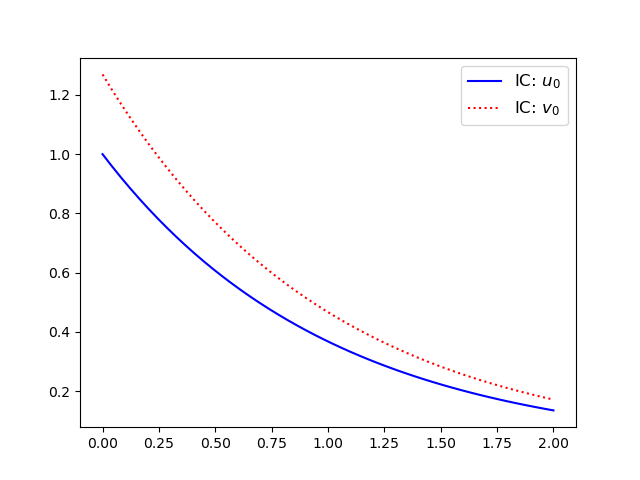

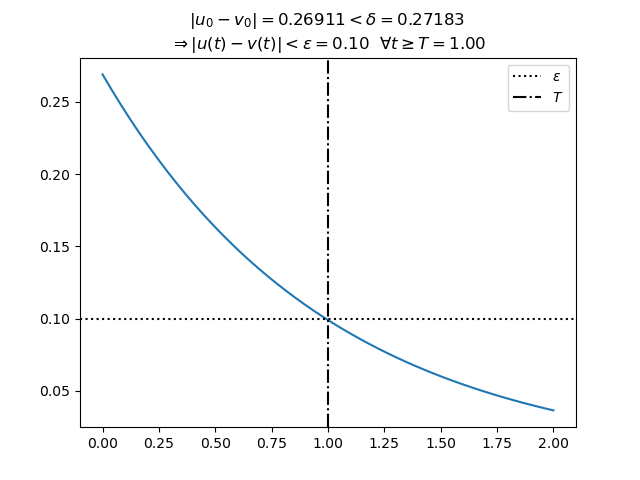

In [15]:
%matplotlib widget

t = np.linspace(0, 2, 50)

plt.figure(4)
# Plot the solutions using the original IC and its perturbed value
plt.plot(t, simple_solution(t, u_0), 'b', label='IC: $u_0$')
plt.plot(t, simple_solution(t, v_0), 'r:', label='IC: $v_0$')
plt.legend(fontsize=12)

plt.figure(5)
# Plot the absolute value of the difference in solutions to observe stability.
plt.plot(t, np.abs(simple_solution(t, u_0)-simple_solution(t, v_0)))
plt.axhline(epsilon, ls=':', c='k', label=r'$\epsilon$')
plt.axvline(T, ls='-.', c='k', label=r'$T$')
plt.title(r'$|u_0-v_0| = ${:.5f}$< \delta =${:.5f} '.format(r*delta, delta) +\
          '\n'+\
          r'$\Rightarrow |u(t)-v(t)| < \epsilon=${:.2f} $\ \forall t\geq T=${:.2f}'.format(epsilon, T))
plt.legend()

---
### Section 1.4.2: Exploring generalizations of stability through activities
---

---
#### Student Activity
---

Consider the IVP:

$$
    \begin{cases}
        u'(t) &= -\alpha u(t), \ t>0 \\
        u(0) &= u_0,
    \end{cases}
$$

for a given $\alpha>0$.

1. Prove that the IVP is stable with respect to perturbations in $u_0$. Generate plots that demonstrate this stability.

*Hint: The `simple_solution` function from above needs to be generalized to account for an `alpha` parameter in the code.*

In [26]:
def less_simple_solution(t, u_0, alpha):
    return u_0 * np.exp(-alpha * t)

---
#### Example proof of stability of an IVP with respect to $u_0\in\mathcal{S}\subset\mathbb{R}$
---

Consider the IVP

$$
    \begin{cases}
        u'(t) &= -\alpha u(t), \ t>0 \ \alpha > 0 \\
        u(0) &= u_0.
    \end{cases}
$$

Prove this IVP is stable with respect to any IC $u_0\in\mathbb{R}$.

***Scratch work:***

Note that the solutions to this IVP are given by $u(t)=u_0e^{-t}$, so we let $v(t)=v_0e^{-t}$ denote the solution with respect to perturbed IC. Then, we get to work by supposing we "get what we want" which is the conclusion:

$
    \begin{align*}
        |u(t)-v(t)| &= |u_0e^{-\alpha t} - v_0e^{-\alpha t}| \\ \\
                    &= |u_0 - v_0|e^{- \alpha t}\\ \\ 
                    &\leq |u_0 - v_0|e^{-\alpha T}  \ \text{ (because $t\geq T$ and $\alpha > 0$ implies $e^{-\alpha t}\leq e^{-\alpha T}$)}
    \end{align*}
$

If we we can make $|u_0-v_0|e^{-\alpha T}<\epsilon$, then it follows that $|u(t)-v(t)|<\epsilon$. We observe that $|u_0-v_0|e^{-\alpha T}<\epsilon$ implies $|u_0-v_0| < \epsilon e^{\alpha T}$. It is then clear that if we choose $\delta = \epsilon e^{\alpha T}$ and consider $v_0$ such that $|u_0-v_0|<\delta$, then everything will work out. 

Note that $\delta$ is a function of $\epsilon$ and $T$ but is not dependent upon the choice of $u_0$. In general, we expect $\delta$ to be a function of all three of these terms.


***Proof:***


**Step 1:** Let $u_0\in\mathbb{R}$, $T>0$, $\alpha > 0$, and $\epsilon>0$. 

**Step 2:** Choose $\delta = \epsilon e^{\alpha T}>0$. 

**Step 3:** Let $v_0\in\mathbb{R}$ such that $|u_0-v_0|<\delta$.

**Step 4:** Let $t\geq T$.

**Step 5:** Then, 
$
    \begin{align*}
        |u(t)-v(t)| &= |u_0e^{-\alpha t} - v_0e^{-\alpha t}|\\ \\ 
                    &= |u_0 - v_0|e^{-\alpha t} \\ \\
                    &\leq |u_0 - v_0|e^{-\alpha T} \ \text{ (because $t\geq T$ and $\alpha > 0$ implies $e^{-\alpha t}\leq e^{-\alpha T}$)} \\ \\
                    &< \delta e^{-\alpha T} \\ \\
                    &= \epsilon. \ \Box
    \end{align*}
$

We demonstrate the elements of this proof in code below.

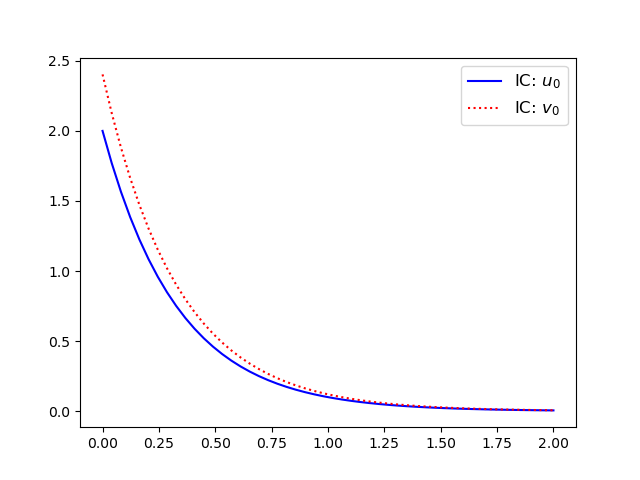

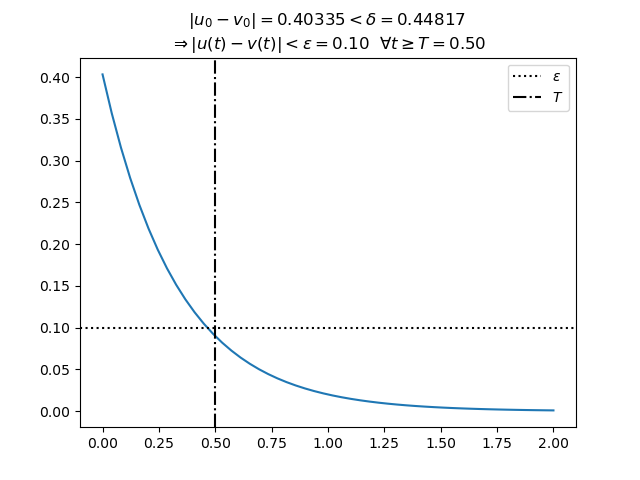

In [31]:
# Define an IC
u_0 = 2
alpha = 3

# Give a T and epsilon
T = .5
epsilon = 0.1

# Choose the delta
delta = epsilon * np.exp(T*alpha)

# Choose $r\in(0,1)$ such that $|u_0-v_0|=r\delta < \delta$.
r = 0.9

# Define the perturbed IC, $v_0 = u_0+\epsilon$, call solution $v(t)$
v_0 = u_0 + r*delta

%matplotlib widget

t = np.linspace(0, 2, 50)

plt.figure(4)
# Plot the solutions using the original IC and its perturbed value
plt.plot(t, less_simple_solution(t, u_0, alpha), 'b', label='IC: $u_0$')
plt.plot(t, less_simple_solution(t, v_0, alpha), 'r:', label='IC: $v_0$')
plt.legend(fontsize=12)

plt.figure(5)
# Plot the absolute value of the difference in solutions to observe stability.
plt.plot(t, np.abs(less_simple_solution(t, u_0, alpha)-less_simple_solution(t, v_0, alpha)))
plt.axhline(epsilon, ls=':', c='k', label=r'$\epsilon$')
plt.axvline(T, ls='-.', c='k', label=r'$T$')
plt.title(r'$|u_0-v_0| = ${:.5f}$< \delta =${:.5f} '.format(r*delta, delta) +\
          '\n'+\
          r'$\Rightarrow |u(t)-v(t)| < \epsilon=${:.2f} $\ \forall t\geq T=${:.2f}'.format(epsilon, T))
plt.legend()

We define stability of the above IVP with respect to perturbations in parameter $\alpha$ as follows:

> For the above IVP with parameter $\alpha$ and solution $u(t)$, we call the IVP stable with respect to perturbations in $\alpha$ if for all $T, \epsilon>0$ there exists an $\delta>0$ such that $|\alpha-\beta|<\delta$ implies $|u(t)-v(t)|<\epsilon$ for all $t\geq T$. Here, $v(t)$ denotes the solution to the IVP with parameter $\beta$.

2. Prove the IVP is stable with respect to perturbations for all parameters $\alpha>0$. Separately prove that the IVP is not stable with respect to perturbations of parameters $\alpha\leq 0$. In other words, the set $\mathcal{S}$ of parameter values for which the IVP is stable is $\mathcal{S}=(0,\infty)$. Generate plots that demonstrate the stability for $\alpha>0$ and instability for $\alpha\leq 0$.

***Proof:***


**Step 1:** Let $u_0\in\mathbb{R}$, $T>0$, $\alpha > 0$, and $\epsilon>0$. 

**Step 2:** Choose $\delta =\dfrac{\ln\left(\epsilon e^{\alpha T} + 1\right)}{T}$. 

**Step 3:** Let $\beta\in\mathbb{R}$ such that $|\alpha - \beta|<\delta$.$

**Step 4:** Let $t\geq T$.

**Step 5:** Then, 
$
    \begin{align*}
        |u(t)-v(t)| &= |u_0e^{-\alpha t} - u_0e^{-\beta t}|\\ \\ 
                    &= |u_0 - v_0|e^{-\alpha t} \\ \\
                    &\leq |u_0 - v_0|e^{-\alpha T} \ \text{ (because $t\geq T$ and $\alpha > 0$ implies $e^{-\alpha t}\leq e^{-\alpha T}$)} \\ \\
                    &< \delta e^{-\alpha T} \\ \\
                    &= \epsilon. \ \Box
    \end{align*}
$

We demonstrate the elements of this proof in code below.

We define stability of the above IVP with respect to *joint* perturbations in IC $u_0$ and parameter $\alpha$ as follows:

> For the above IVP with IC $u_0$, parameter $\alpha$ and solution $u(t)$, we call the IVP stable with respect to perturbations in $(u_0, \alpha)\in\mathbb{R}^2$ if for all $T, \epsilon>0$ there exists an $\delta>0$ such that $\|(u_0,\alpha)-(v_0,\beta)\|<\delta$ implies $|u(t)-v(t)|<\epsilon$ for all $t\geq T$. Here, $v(t)$ denotes the solution to the IVP with IC $v_0$ and parameter $\beta$ and $\| \cdot \|$ denotes a norm on $\mathbb{R}^2$. 

*Since all norms are equivalent on $\mathbb{R}^2$, we are free to choose whichever we please. The $\sup$-norm metric is by far the easiest one to work with in the proofs.*

3. Prove stability with respect to joint perturbations in the IC and parameter on $\mathcal{S}=\mathbb{R}\times (0,\infty)\subset\mathbb{R}^2$. Generate plots that demonstrate the stability for certain choices of $(\alpha, u_0)\in\mathbb{R}^2$ and instability for other choices.

---
#### Student Activity
---

Consider the nonlinear IVP:

$$
    \begin{cases}
        u'(t) &= tu(t)(u(t)-2), \\
        u(0) &= u_0.
    \end{cases}
$$

We use `sympy` to verify that
<br><br>
$$
    u(t) = \frac{2u_0}{u_0+(2-u_0)e^{t^2}}
$$
<br><br>
solves this IVP for all $u_0$.



In [ ]:
import sympy as sym

In [ ]:
t, u0 = sym.symbols('t, u_0')

In [ ]:
u0  # Subscripts appear as expected

In [ ]:
u = 2*u0 / (u0 + (2-u0)*sym.exp(t**2))
u

First, we verify the IC holds.

In [ ]:
u.subs(t, 0)  # This should be $u_0$

Next, we verify ODE is satisfies by computing the left- and right-hand sides of the ODE for the given $u(t)$ and checking to see if they are the same (which is equivalent to checking if their difference is zero).

In [ ]:
lhs = u.diff(t, 1)  # left-hand side (lhs) of ODE
lhs

In [ ]:
rhs = t*u*(u-2)  # right-hand side (rhs) of ODE
rhs

In [ ]:
lhs - rhs

In [ ]:
sym.simplify(lhs - rhs)

1. Prove that if $0\leq u_0\leq 2$, then $0\leq u(t)\leq 2$ for all $t\geq 0$. Generate plots to demonstrate this.

2. Prove that if $u_0>2$, then $u(t)\to \infty$ as 
$$
    t\to \left(\ln\left(\frac{u_0}{u_0-2}\right)\right)^{1/2}. 
$$
Generate plots that demonstrate this.

3. Use the closed-form solution of $u(t)$ given in 1. along with 2. and 3. to make conclusions about the stability properties of $u(t)$ with respect to perturbations in $u_0$ for $0\leq u_0\leq 2$ and for $u_0>2$. Generate plots to support your conclusions. 

---
### Section 1.4.3: Stability of Numerical Methods
---

[Numerical stability](https://en.wikipedia.org/wiki/Numerical_stability) is an important topic in numerical analysis. Questions of numerical stability are particularly relevant in the study of numerical estimation of solutions to differential equations.

A [**stiff equation**](https://en.wikipedia.org/wiki/Stiff_equation) is somewhat of a "catch-all" term for any differential equation for which certain numerical methods become unstable unless the step size is controlled. 

The prototypical stiff equation for which we study stability is $u'(t) = \alpha u$ subject to the initial condition $u(0)=1$ (compare this to the IVP considered in the first activity from above). The $\alpha$ parameter is allowed to be complex-valued. We refer to this as the **test equation** in the stability analysis.

---
#### Three notions of stability for numerical solution to ODEs
---

We present the notions of stability quite generally where it is assumed that whatever numerical method we use is governed by a particular step size denoted by $\Delta t>0$.

1. **Zero Stability.** This just means that perturbations remain bounded in the limit as $\Delta t\to 0$. 

Thus, zero stability, at a conceptual level, is very much like the stability we have seen above in the context of exact solutions to an IVP. 

This is rather a weak form of stability. For instance, we can prove convergence of a zero-stable method but then easily come up with examples where the exact solution converges to zero while the numerical solution oscillates with increasing amplitudes. Below, we consider the test problem with negative $\alpha$ and get bad numerical results unless we make the step size very small using the common Forward Euler method studied in the [previous notebook](Chp1Sec3.ipynb).

2. **Absolute (or Unconditional) Stability.** This is also called **A-stability** for short. This means that applying the numerical method to the test problem with $\operatorname{Re}(\alpha)<0$ gives numerical solutions with the correct numerical behavior (i.e., the solutions should tend towards zero). The problem here is that we can have absolutely stable methods that damp rapidly decaying components only slightly, and small time steps might have to be used causing unnecessary computational burden.

3. **L-Stability.** This is a method with *strong decay* for the test problem (with negative real-part of $\alpha$), and we should be able to use larger time steps to get good results.

***We will only examine (briefly) the zero and A-stability criteria in the context of the Forward Euler method.***

---
#### Unstable computations with the Forward Euler (FE) method - motivation for Absolute Stability:
---

The exact solutions to a simple problem can have extremely nice behavior, yet the numerical solution can be awful. The main problem is that the step size $\Delta t$ may just be too large. Applying the FE method to the test problem, we can rewrite the numerical solution $v_m$ (using the notation from the previous notebook where $v_m\approx u(t_m)=u(m\Delta t)$) as

$$
    v_m = (1+\alpha \Delta t)^m.
$$

- If $\alpha$ is real and $\alpha<0$, then the exact solution decays to zero {\em exponentially}. 

- Ideally, we would like to take *large time steps* to approximate such a simple solution. Unfortunately, if $\alpha = -10$ and $\Delta t=1$, then $v_m = (-9)^m$ which blows up and oscillates (behaviors that are not present in the exact solution). 

- We need $|1+\alpha \Delta t|\leq 1$ in order for the numerical solution to not blow up.

  For real $\alpha$, we are simply saying that this will hold for $\alpha<0$ if and only if $\Delta t$ is less than or equal to $1/|\alpha|$. 
  
We are focusing on solving IVPs for now. Sometimes an IVP is written as a system of ODEs. Linear real-valued systems of first-order ODEs have solutions written in terms of eigenvalues of the matrix used to describe the system. Eigenvalues can be complex. Thus, we replace $\alpha\Delta t$ with complex variable $z$, and we are looking for the $z$ values such that $|1+z|\leq 1$. These are the values such that $-2\leq z \leq 0$, which is the disk of radius 1 centered at $(-1,0)$ in the complex plane. 

Given a particular complex valued $\alpha$ with negative real-part, we need to choose $\Delta t$ sufficiently small so that $z=\alpha \Delta t$ is in the disk to ensure that the numerical solution qualitatively behaves similarly to the exact solution (i.e., that the numerical solution decays as it should). We call the disk in the complex plain the **region of absolute stability** since absolute stability is simply referring to the fact that we asymptotically get the correct numerical solution.

In [ ]:
def forward_Euler(f, Delta_t, n, u_0):
    # Assuming f is passed as a function of (t,u)
    v = np.zeros(n)
    v[0] = u_0
    for i in range(1,n):
        v[i] = v[i-1] + Delta_t * f(i*Delta_t, v[i-1])
    return v

In [ ]:
def plot_forward_Euler_test(t_f, Delta_t, alpha=-10, num=1):
    plt.figure(num)
    plt.clf()
    
    n = int(t_f/Delta_t)
    t = np.linspace(0, t_f, n+1)
    
    f_alpha = lambda t, u: alpha * u

    plt.plot(t, forward_Euler(f_alpha, t[1]-t[0], n+1, 1), 
             'r:', marker='s', label='Approx. soln')
    
    u_alpha = lambda t: np.exp(alpha*t)
    
    plt.plot(t, u_alpha(t), 'b', label='Exact soln')
    
    plt.title(r'$1+\alpha\Delta t$={:.2e}'.format(1+alpha*Delta_t) +\
              '\nThis should be in $[-1,1]$ to not blow up,'+\
              '\nand be in $[0,1]$ to not have oscillations.')
    plt.legend()
    plt.show()
    plt.tight_layout()

In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [ ]:
%reset -f out 

%matplotlib widget
interact_manual(plot_forward_Euler_test, 
            t_f = fixed(1),
            Delta_t = widgets.FloatText(value=0.2, step=0.01),
            alpha = widgets.FloatText(value=-10, step=1),
            num = fixed(20))

---
## Navigation:

- [Previous](https://github.com/CU-Denver-MathStats-OER/Intro-PDEs-Theory-and-Computations/blob/main/Chp1/Chp1Sec3.ipynb)

- [Next](https://github.com/CU-Denver-MathStats-OER/Intro-PDEs-Theory-and-Computations/blob/main/Chp1/Chp1Sec5.ipynb)
---